<a href="https://colab.research.google.com/github/wolfzxcv/ml-examples/blob/master/CNN_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


**Importing the Dataset**

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Exploring the Data**

In [ ]:
print (test_images.shape)
print (len(train_images))
print (train_labels)


(10000, 28, 28)
60000
[9 0 0 ... 3 0 5]


**Preprocessing**

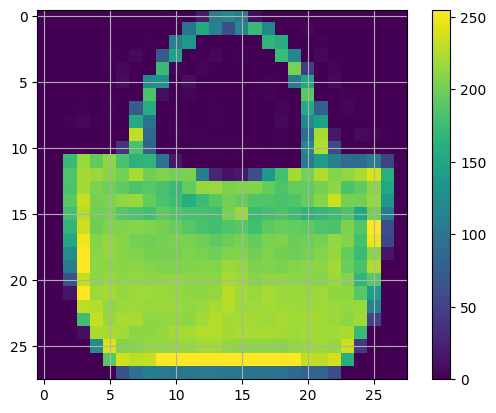

In [ ]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(True)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

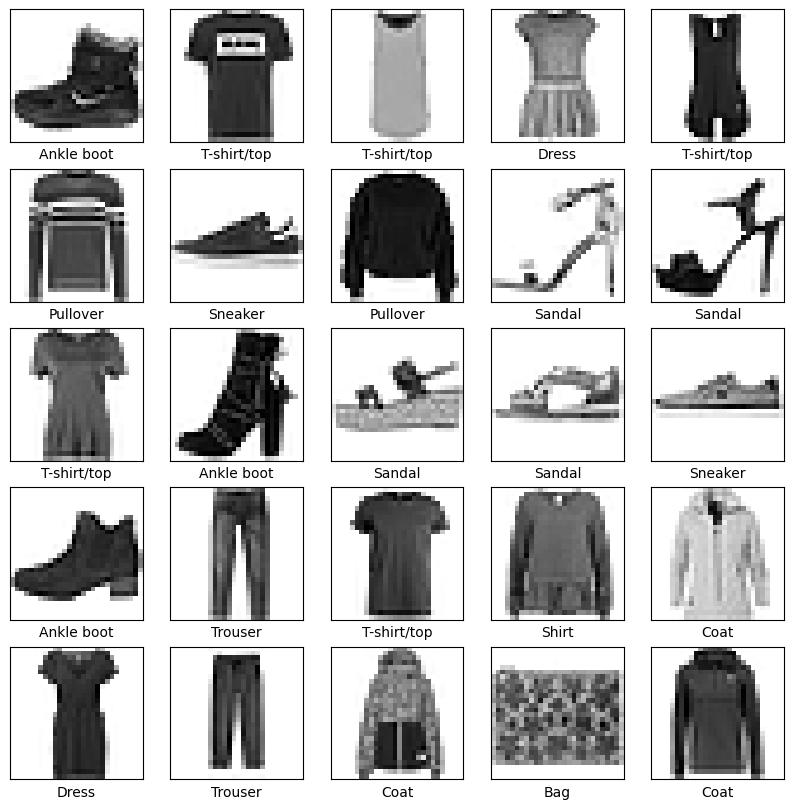

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Build the model**

Setting up Layers

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train

In [ ]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2330 - accuracy: 0.9144
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2243 - accuracy: 0.9156
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2192 - accuracy: 0.9185
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2123 - accuracy: 0.9204
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2069 - accuracy: 0.9222
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2008 - accuracy: 0.9246
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1947 - accuracy: 0.9265
Epoch 8/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1898 - accuracy: 0.9287
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1869 - accuracy: 0.9298
Epoch 10/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.181

Evaluate Accuracy

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3925 - accuracy: 0.8832 - 722ms/epoch - 2ms/step

Test accuracy: 0.8831999897956848


Make Predictions

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)
print (predictions[12])
print (np.argmax(predictions[12])) #predicted for image 12
print (test_labels[12]) #real output for image 12

313/313 [==============================] - 1s 2ms/step
[6.0184989e-11 1.7116263e-13 1.7946392e-12 1.3115930e-14 1.0690088e-12
 6.9371092e-01 2.9586597e-10 3.8060311e-02 2.6822877e-01 1.3825748e-08]
5
7


Prepare to visualize

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Predict and Visualize single values

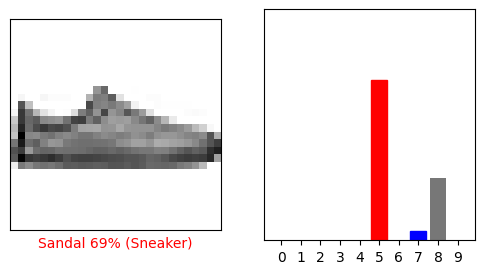

In [ ]:
i = 12     #image no.
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Bulk predictions

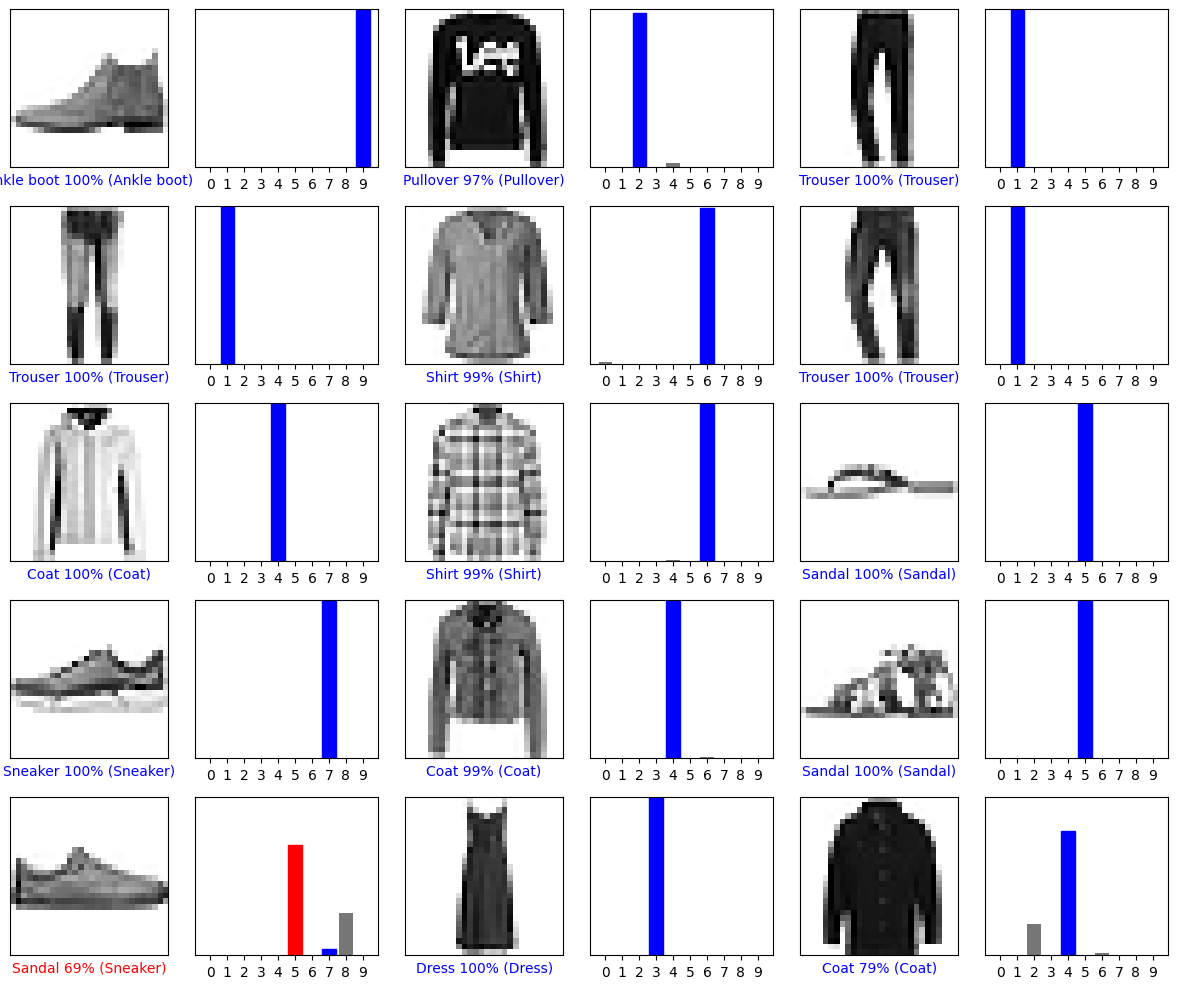

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Use the trained model

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 21ms/step
[[6.0184822e-11 1.7116247e-13 1.7946376e-12 1.3115968e-14 1.0690078e-12
  6.9371164e-01 2.9586569e-10 3.8060352e-02 2.6822802e-01 1.3825761e-08]]


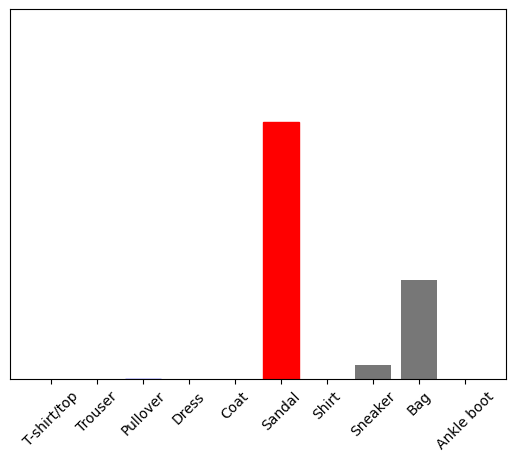

In [ ]:
# Grab an image from the test dataset.
img = test_images[12]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()